# ***Packaging***

In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***1. Data loading, data type correction, and removal of irrelevant variables***

In [594]:
#Loading data as df (dataframe)
df = pd.read_excel('Portfolio Puma MGM.xlsx', sheet_name=0)
df.head(2)

,Case Name,Account Name,State,Rate,Provider Client,DOL,Subject,Name of Procedure,Case Stage,Stage Chg Dt,...,Inv 1 Pd Dt,Inv 1 Pd $,Inv 2 Pd Dt,Inv 2 Pd $,Inv 3 Pd Dt,Inv 3 Pd $,Funding Status,Case Notes,Lien Notes,Case Status
0,Derek Bell,Ace Law Group,NaN,NaN,Pueblo Medical Imaging,NaN,Lien1,MRI Joint Upper Extremity wo Dye,Completed,01/13/2022,...,06/21/2021,825.0,NaN,0.0,NaN,0.0,Purchased,NaN,"02,20 Settled","2/20/20: Settled per case mgr, \nPaid complete..."
1,Derek Bell,Ace Law Group,NaN,NaN,Pueblo Medical Imaging,NaN,Lien2,MRI Cervical Spine wo Contrast,Completed,01/13/2022,...,06/21/2021,825.0,NaN,0.0,NaN,0.0,Purchased,NaN,NaN,"2/20/20: Settled per case mgr, \nPaid complete..."


In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Case Name          3673 non-null   object 
 1   Account Name       3673 non-null   object 
 2   State              13 non-null     object 
 3   Rate               645 non-null    object 
 4   Provider Client    3673 non-null   object 
 5   DOL                2887 non-null   object 
 6   Subject            3673 non-null   object 
 7   Name of Procedure  3338 non-null   object 
 8   Case Stage         3673 non-null   object 
 9   Stage Chg Dt       3667 non-null   object 
 10  DOS                3671 non-null   object 
 11  Batch Dt           3663 non-null   object 
 12  Bill Amt           3673 non-null   float64
 13  Purch Amt          3673 non-null   float64
 14  Purch Dt           3657 non-null   object 
 15  Investor 1         3673 non-null   object 
 16  Port 1             3645 

In [596]:
# Antes de eliminar variables irrelevantes eliminamos los registros que no tienen fecha de pago
df = df.dropna(subset=['Pay Dt'])

# ***2. Eliminar variables irrelevantes y redundantes***
* Irrelevantes: cedulas, ids, nombres, telefonos, direcciones, códigos.
* Redundantes: validación por fórmula matemática que están repetidas

In [597]:
# Removal of irrelevant variables
irrelevant_variables = ['Case Name','Inv 1 Pd Dt','Inv 2 Pd Dt','Inv 3 Pd Dt','Case Notes','Lien Notes','Case Status','DOL','DOS','Investor 1','Port 1','Investor 2','Port 2','State','Inv 1 Purch $','Inv 2 Purch $','Inv 1 Pd $','Inv 2 Pd $','Inv 3 Pd $','Rate','Stage Chg Dt','Batch Dt','Pay Dt', 'Case Stage','Name of Procedure','Purch Dt']
df = df.drop(irrelevant_variables, axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account Name     3673 non-null   object 
 1   Provider Client  3673 non-null   object 
 2   Subject          3673 non-null   object 
 3   Bill Amt         3673 non-null   float64
 4   Purch Amt        3673 non-null   float64
 5   Pay Amt          3664 non-null   float64
 6   Funding Status   3665 non-null   object 
dtypes: float64(3), object(4)
memory usage: 201.0+ KB


In [598]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
0,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0,Purchased
1,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0,Purchased
2,Ace Law Group,LVR,imaging 1,1650.0,495.0,990.0,Purchased
3,Ace Law Group,LVR,imaging 2,1650.0,495.0,990.0,Purchased
4,Ace Law Group,LVR,imaging 3,1650.0,495.0,990.0,Purchased


In [599]:
# Data type casting (corrections)
categorical_columns = ['Account Name','Provider Client','Funding Status','Subject']
df[categorical_columns] = df[categorical_columns].astype('category')

numerical_columns = ['Bill Amt', 'Purch Amt','Pay Amt']
df[numerical_columns] = df[numerical_columns].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3673 non-null   category
 1   Provider Client  3673 non-null   category
 2   Subject          3673 non-null   category
 3   Bill Amt         3673 non-null   float64 
 4   Purch Amt        3673 non-null   float64 
 5   Pay Amt          3664 non-null   float64 
 6   Funding Status   3665 non-null   category
dtypes: category(4), float64(3)
memory usage: 105.0 KB


# ***3. Statistical analysis***

In [ ]:
df['Provider Client'].unique()

['Ace Law Group', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'BD & J Law Firm', 'Benjamin Nadig Law', ..., 'Vannah & Vannah Law Firm', 'VC2 Law', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm  CA', 'Yan Kenyon Law']
Length: 36
Categories (36, object): ['Ace Law Group', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'BD & J Law Firm', ..., 'Vannah & Vannah Law Firm', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm  CA', 'Yan Kenyon Law']

<Axes: xlabel='Provider Client'>

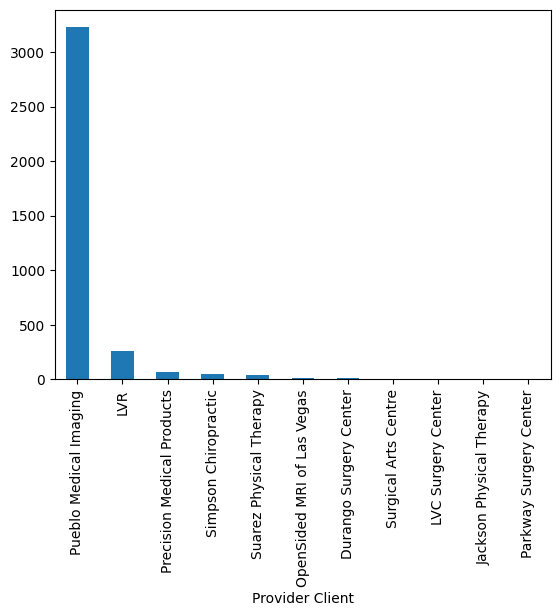

In [601]:
df['Provider Client'].value_counts().plot(kind='bar')

<Axes: xlabel='Subject'>

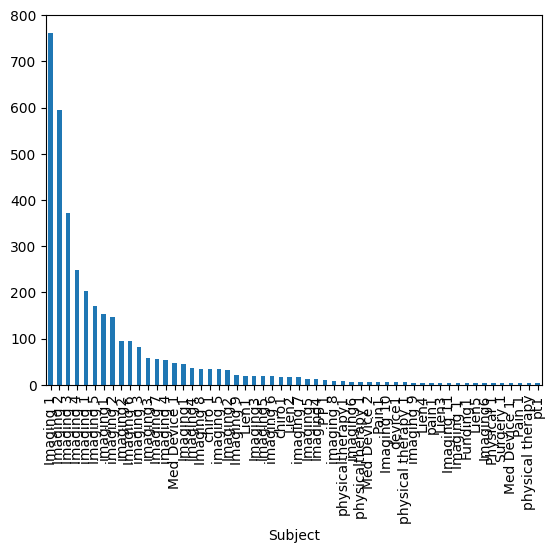

In [602]:
df['Subject'].value_counts().plot(kind='bar')

In [603]:
# print(df['Subject'].unique())
print(list(df['Subject'].unique()))

['Lien1', 'Lien2', 'imaging 1', 'imaging 2', 'imaging 3', 'imaging1', 'imaging2', 'pain1', 'imaging3', 'Imaging1', 'Imaging2', 'Imaging 1', 'Imaging 2', 'Imaging 3', 'Imaging 5', 'Imaging 4', 'Pain 1', 'Imaging 1 ', 'Imaging 6', 'imaging4', 'PT 1', 'Physical 1', 'physicaltherapy 1', 'chiro 1', 'chiro1', 'device1', 'Med Device 1', 'Med Device 2', 'imaging5', 'imaging6', 'Imaging3', 'Imaging4', 'Imaging 7', 'Imaging 8', 'Imaging 9', 'Imaging 11', 'physicaltherapy1', 'imaging 4', 'imaging 5', 'imaging 6', 'Funding1', 'Lien3', 'Lien4', 'Imaging5', 'Imaging6', 'Pain1', 'pt1', 'imaging 7', 'physical therapy 1', 'physical therapy', 'imaging 8', 'imaging 9', 'Imaging 10', 'Surgery 1', 'Med Device 1 ', 'Lien5']


<Axes: xlabel='Funding Status'>

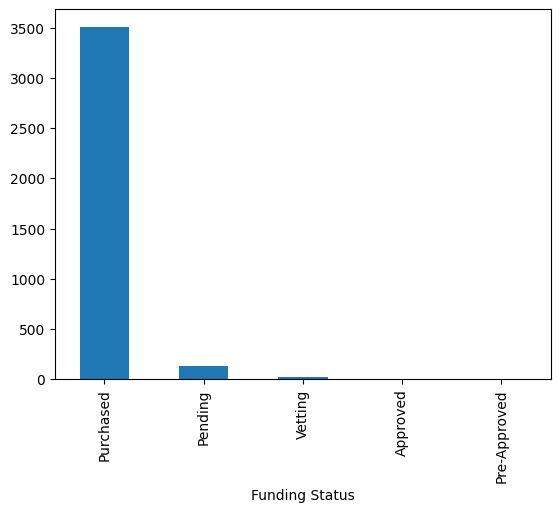

In [604]:
df['Funding Status'].value_counts().plot(kind='bar')

<Axes: >

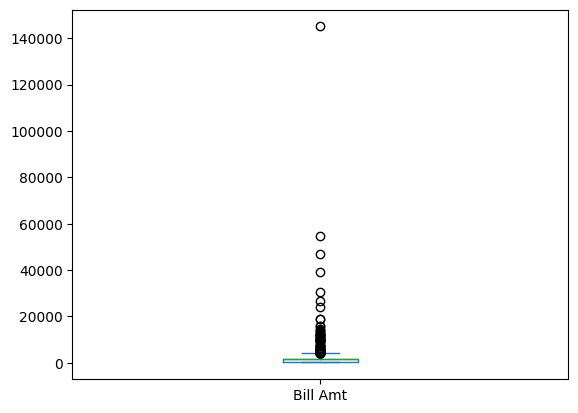

In [605]:
df['Bill Amt'].plot(kind='box')

<Axes: >

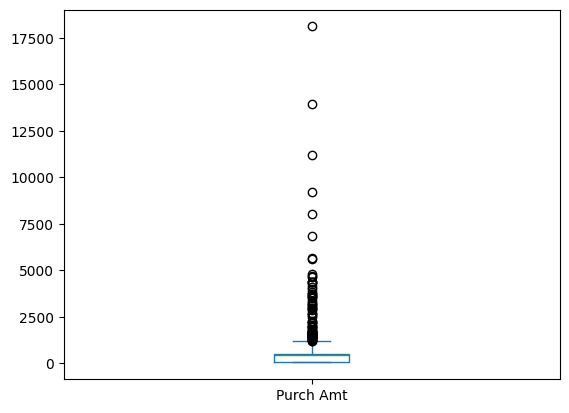

In [606]:
df['Purch Amt'].plot(kind='box')

<Axes: >

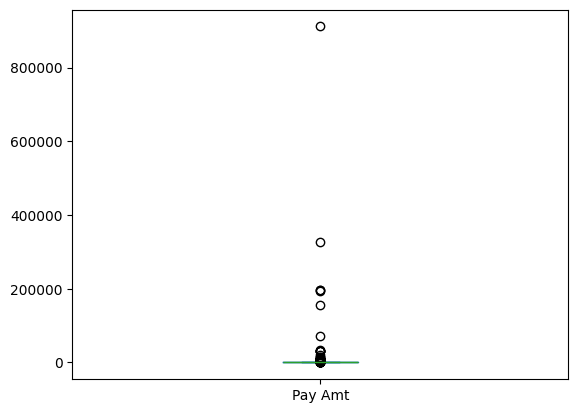

In [607]:
df['Pay Amt'].plot(kind='box')

In [608]:
# from ydata_profiling import ProfileReport

# profile_data=ProfileReport(df, minimal=True) # minimal=True
# profile_data

# ***4. Limpeza de datos y atípicos por errores***

### ***Eliminación de procesos aún no terminados para el análisis de ROI de los terminados***

In [609]:
df['Funding Status'].unique()

['Purchased', 'Pre-Approved', 'Pending', 'Approved', 'Vetting', NaN]
Categories (5, object): ['Approved', 'Pending', 'Pre-Approved', 'Purchased', 'Vetting']

In [610]:
# Se eliminan los registros que hayan sido declined porque no se tiene información completa de ellos y los que nos importa analizar son los comprados

indices_a_eliminar = df[df['Funding Status'] != 'Purchased'].index

# Eliminar esas filas usando drop(axis=0)
df.drop(indices_a_eliminar, axis=0, inplace=True)

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, 0 to 3672
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3509 non-null   category
 1   Provider Client  3509 non-null   category
 2   Subject          3509 non-null   category
 3   Bill Amt         3509 non-null   float64 
 4   Purch Amt        3509 non-null   float64 
 5   Pay Amt          3502 non-null   float64 
 6   Funding Status   3509 non-null   category
dtypes: category(4), float64(3)
memory usage: 127.8 KB


In [612]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
0,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0,Purchased
1,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0,Purchased
2,Ace Law Group,LVR,imaging 1,1650.0,495.0,990.0,Purchased
3,Ace Law Group,LVR,imaging 2,1650.0,495.0,990.0,Purchased
4,Ace Law Group,LVR,imaging 3,1650.0,495.0,990.0,Purchased


<Axes: xlabel='Funding Status'>

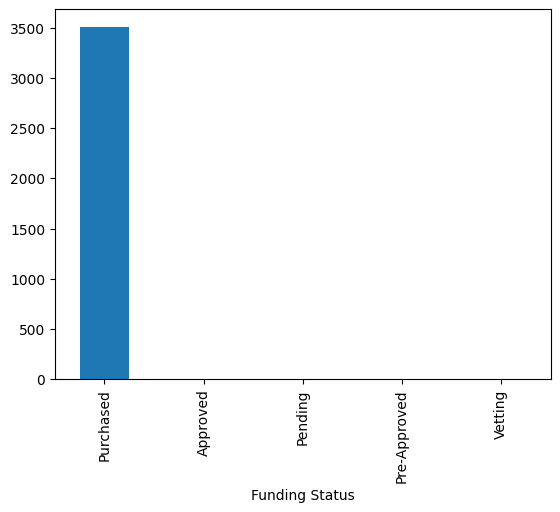

In [613]:
df['Funding Status'].value_counts().plot(kind='bar')

In [614]:
# Como todos los datos pertenecen a la cateoría Purchased de Funding Status entonces eliminamos esta variable por ser redundante
df = df.drop('Funding Status', axis=1)

### ***Existen procesos que a pesar de haber sido comprados aún no se han terminado porque están a la espera de que el abogado pague (Pay amt = nan) por lo que estos registros no se pueden utilizar porque se utiliza Pay amt para calcular nuestra variable objetivo***

In [615]:
# Se eliminan  los registros donde Pay amt sea nula
df = df.dropna(subset=['Pay Amt'])

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3502 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3502 non-null   category
 1   Provider Client  3502 non-null   category
 2   Subject          3502 non-null   category
 3   Bill Amt         3502 non-null   float64 
 4   Purch Amt        3502 non-null   float64 
 5   Pay Amt          3502 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 123.9 KB


In [617]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
0,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0
1,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0
2,Ace Law Group,LVR,imaging 1,1650.0,495.0,990.0
3,Ace Law Group,LVR,imaging 2,1650.0,495.0,990.0
4,Ace Law Group,LVR,imaging 3,1650.0,495.0,990.0


### ***Limpieza de errores en los datos y unificación de categorías válidas mediante uso de expresiones regulares***

In [618]:
df['Subject'].unique()

['Lien1', 'Lien2', 'imaging 1', 'imaging 2', 'imaging 3', ..., 'Imaging 10', 'Surgery 1', 'Med Device 1 ', 'Physical 1', 'Lien5']
Length: 56
Categories (56, object): ['Funding1', 'Imaging 1', 'Imaging 1 ', 'Imaging 10', ..., 'physical therapy 1', 'physicaltherapy 1', 'physicaltherapy1', 'pt1']

<Axes: xlabel='Subject'>

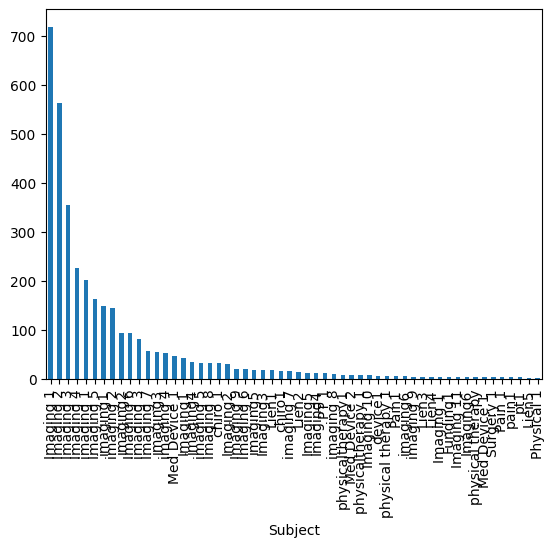

In [619]:
df['Subject'].value_counts().plot(kind='bar')

In [620]:
df['Subject'] = (
    df['Subject']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)        # espacios múltiples a uno
    .str.replace(r'[^\w\s]', ' ', regex=True)    # caracteres especiales a espacio
    .str.replace(r'\s+', ' ', regex=True)        # limpiar espacios de nuevo
    .str.strip()                                  # eliminar espacios inicio/fin
    .str.replace(r'\d+', '', regex=True)         # eliminar números (imaging1 → imaging)
    .str.strip()                                  # limpiar espacios finales
)
# Creación de columna de limpieza
df['Subject_Clean'] = np.nan

In [621]:
# Definir mapeo de agrupación
mapeo = {
    r'^(?:imaging|iamging|imagine|imagin|imagiong|imag)': 'Imaging',
    r'^(?:surg|surgical|lcv|lvc|surgical\s*care)': 'Surgery',
    r'^(?:med\s*dev|device|decive|product|mec\s*device|medprod)': 'Medical Device',
    r'^(?:pt|spt|jpt|physical|phsicaltherapy|phystherapy)': 'Physical Therapy',
    r'^(?:chiro|ad\s*chiro)': 'Chiropractic',
    r'^pain': 'Pain Management',
    r'^(?:neuro|neurology)': 'Neurology',
    r'^(?:eval|medeval|consult)': 'Evaluation',
    r'^lab': 'Laboratory',
    r'^ortho': 'Orthopedics',
    r'^lien': 'Lien',
    r'^pharmacy': 'Pharmacy',
    r'^(?:psych)': 'Psychiatry',
    r'^er$': 'Emergency Room',
    r'^amnio': 'Amniocentesis',
    r'^(?:funding|void|osm|oms|sac|has|adc|no\s*show|loan|test)': 'Administrative',
    r'^procedure': 'Medical Procedure'
}

for pattern, category in mapeo.items():
    mask = df['Subject'].str.contains(pattern, regex=True, na=False)
    df.loc[mask, 'Subject_Clean'] = category

print(f"\nCategorización por patrones completada")
print(f"Registros categorizados: {df['Subject_Clean'].notna().sum()}")
print(f"Registros sin categorizar: {df['Subject_Clean'].isna().sum()}")

uncategorized = df[df['Subject_Clean'].isna()]['Subject'].unique()

# Reemplazamos los datos de Subject por los limpiados
df['Subject'] = df['Subject_Clean']
df = df.drop('Subject_Clean', axis=1)


Categorización por patrones completada
Registros categorizados: 3502
Registros sin categorizar: 0


/tmp/ipykernel_21514/3533853691.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Imaging' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'Subject_Clean'] = category


In [622]:
uncategorized

array([], dtype=object)

In [623]:
df['Subject'].unique()

array(['Lien', 'Imaging', 'Pain Management', 'Physical Therapy',
       'Chiropractic', 'Medical Device', 'Administrative', 'Surgery'],
      dtype=object)

In [624]:
df['Subject'].value_counts()

Subject
Imaging             3284
Medical Device        64
Chiropractic          49
Lien                  43
Physical Therapy      40
Pain Management       14
Administrative         4
Surgery                4
Name: count, dtype: int64

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3502 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3502 non-null   category
 1   Provider Client  3502 non-null   category
 2   Subject          3502 non-null   object  
 3   Bill Amt         3502 non-null   float64 
 4   Purch Amt        3502 non-null   float64 
 5   Pay Amt          3502 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 145.3+ KB


### ***Organización de categorías de Account Name***

In [626]:
print(list(df['Account Name'].unique()))

['Ace Law Group', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Blackburn Wirth Injury Team', 'Cardenas Law Group', 'David W Fassett Personal Injury Law', 'Dimopoulos Injury Law', 'ER Injury Attorneys', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Goldberg Injury Law', 'Jacoby & Meyers  CA', 'Ladah Law', 'Lalezary Law Firm  CA Law Brothers', 'Law Office of Arash Khorsandi', 'Law Office of Stephen Reid', 'Law Office of Victor M Cardoza', 'Lawrence C Hill & Associates', 'Lloyd Baker Injury Attorneys', 'Mullins & Trenchak Law', 'Muslusky Law', 'Naqvi Injury Law', 'Neal Hyman Law', 'Nwogbe Law Group', 'Parke Law Firm', 'RRCC Firm', 'Sidell Injury Law', 'Valarie Fujii Law Offices', 'Vannah & Vannah Law Firm', 'VC2 Law', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm  CA', 'Yan Kenyon Law']


In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3502 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3502 non-null   category
 1   Provider Client  3502 non-null   category
 2   Subject          3502 non-null   object  
 3   Bill Amt         3502 non-null   float64 
 4   Purch Amt        3502 non-null   float64 
 5   Pay Amt          3502 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 145.3+ KB


In [628]:
df['Account Name'] = (
    df['Account Name']
    .astype(str)
    .str.strip()
    # .str.lower()
    .str.replace(r'\s+', ' ', regex=True)          # Espacios múltiples → uno
    .str.replace(r'[^\w\s&]', '', regex=True)      # Eliminar símbolos raros (excepto &)
    .str.strip()
)
# Creación de columna de limpieza
df['AccountName_Clean'] = np.nan

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3502 entries, 0 to 3672
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       3502 non-null   object  
 1   Provider Client    3502 non-null   category
 2   Subject            3502 non-null   object  
 3   Bill Amt           3502 non-null   float64 
 4   Purch Amt          3502 non-null   float64 
 5   Pay Amt            3502 non-null   float64 
 6   AccountName_Clean  0 non-null      float64 
dtypes: category(1), float64(4), object(2)
memory usage: 195.3+ KB


In [630]:
unique_clean = []

from rapidfuzz import fuzz

for firm in df['Account Name'].unique():
    clean = firm.strip()
    match_found = False
    for ref in unique_clean:
        if fuzz.ratio(clean, ref) > 80:   # Umbral de similitud
            match_found = True
            df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = ref
            break
    if not match_found:
        unique_clean.append(clean)
        df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean

/tmp/ipykernel_21514/3216805034.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ace Law Group' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean


In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3502 entries, 0 to 3672
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       3502 non-null   object  
 1   Provider Client    3502 non-null   category
 2   Subject            3502 non-null   object  
 3   Bill Amt           3502 non-null   float64 
 4   Purch Amt          3502 non-null   float64 
 5   Pay Amt            3502 non-null   float64 
 6   AccountName_Clean  3502 non-null   object  
dtypes: category(1), float64(3), object(3)
memory usage: 195.3+ KB


In [632]:
# --- Reemplazar columna original por la limpia ---
df['Account Name'] = df['AccountName_Clean']
df = df.drop('AccountName_Clean', axis=1)

print(list(df['Account Name'].unique()))

['Ace Law Group', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Blackburn Wirth Injury Team', 'Cardenas Law Group', 'David W Fassett Personal Injury Law', 'Dimopoulos Injury Law', 'ER Injury Attorneys', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Goldberg Injury Law', 'Jacoby & Meyers CA', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Law Office of Arash Khorsandi', 'Law Office of Stephen Reid', 'Law Office of Victor M Cardoza', 'Lawrence C Hill & Associates', 'Lloyd Baker Injury Attorneys', 'Mullins & Trenchak Law', 'Muslusky Law', 'Naqvi Injury Law', 'Neal Hyman Law', 'Nwogbe Law Group', 'Parke Law Firm', 'RRCC Firm', 'Sidell Injury Law', 'Valarie Fujii Law Offices', 'Vannah & Vannah Law Firm', 'VC2 Law', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm CA', 'Yan Kenyon Law']


In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3502 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3502 non-null   object  
 1   Provider Client  3502 non-null   category
 2   Subject          3502 non-null   object  
 3   Bill Amt         3502 non-null   float64 
 4   Purch Amt        3502 non-null   float64 
 5   Pay Amt          3502 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 168.0+ KB


In [634]:
df[~((df['Account Name'].map(df['Account Name'].value_counts()) < 2) & (df['Pay Amt'].isna()))]
print(list(df['Account Name'].unique()))

['Ace Law Group', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Blackburn Wirth Injury Team', 'Cardenas Law Group', 'David W Fassett Personal Injury Law', 'Dimopoulos Injury Law', 'ER Injury Attorneys', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Goldberg Injury Law', 'Jacoby & Meyers CA', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Law Office of Arash Khorsandi', 'Law Office of Stephen Reid', 'Law Office of Victor M Cardoza', 'Lawrence C Hill & Associates', 'Lloyd Baker Injury Attorneys', 'Mullins & Trenchak Law', 'Muslusky Law', 'Naqvi Injury Law', 'Neal Hyman Law', 'Nwogbe Law Group', 'Parke Law Firm', 'RRCC Firm', 'Sidell Injury Law', 'Valarie Fujii Law Offices', 'Vannah & Vannah Law Firm', 'VC2 Law', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm CA', 'Yan Kenyon Law']


In [635]:
df = df[df['Account Name'].map(df['Account Name'].value_counts()) > 2]
print(list(df['Account Name'].unique()))


['Ace Law Group', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Blackburn Wirth Injury Team', 'Cardenas Law Group', 'David W Fassett Personal Injury Law', 'Dimopoulos Injury Law', 'ER Injury Attorneys', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Goldberg Injury Law', 'Jacoby & Meyers CA', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Law Office of Arash Khorsandi', 'Law Office of Stephen Reid', 'Law Office of Victor M Cardoza', 'Lawrence C Hill & Associates', 'Lloyd Baker Injury Attorneys', 'Mullins & Trenchak Law', 'Muslusky Law', 'Naqvi Injury Law', 'Neal Hyman Law', 'Nwogbe Law Group', 'Parke Law Firm', 'RRCC Firm', 'Sidell Injury Law', 'Valarie Fujii Law Offices', 'Vannah & Vannah Law Firm', 'VC2 Law', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm CA', 'Yan Kenyon Law']


In [636]:
len(list(df['Account Name'].unique()))
# Quedaron un total de 84 categorías

36

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3502 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3502 non-null   object  
 1   Provider Client  3502 non-null   category
 2   Subject          3502 non-null   object  
 3   Bill Amt         3502 non-null   float64 
 4   Purch Amt        3502 non-null   float64 
 5   Pay Amt          3502 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 168.0+ KB


### ***Organización de categorías de Provider Client***
**Para esta variable todas las categorías coinciden con las variables válidas en el negocio**

In [638]:
print(list(df['Provider Client'].unique()))

['Pueblo Medical Imaging', 'LVR', 'Durango Surgery Center', 'Parkway Surgery Center', 'Suarez Physical Therapy', 'Jackson Physical Therapy', 'Simpson Chiropractic', 'Precision Medical Products', 'OpenSided MRI of Las Vegas', 'Surgical Arts Centre', 'LVC Surgery Center']


In [639]:
len(list(df['Provider Client'].unique()))

11

### ***Eliminación de duplicados***

Muchas veces se presenta la combinación de que la misma firma de abogados atiende en el mismo consultorio médico (Provider) el grupo de familiares que tuvo el accidente el mismo día y se realizan diferentes bills pero con la misma información de cobro y compra por lo que aparecen como duplicados, estos los eliminamos

In [640]:
df[df.duplicated()]

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
1,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.00
3,Ace Law Group,LVR,Imaging,1650.0,495.0,990.00
4,Ace Law Group,LVR,Imaging,1650.0,495.0,990.00
6,Ace Law Group,LVR,Imaging,1650.0,495.0,907.50
10,Ace Law Group,LVR,Imaging,1650.0,495.0,660.00
...,...,...,...,...,...,...
3665,Yan Kenyon Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,598.25
3668,Yan Kenyon Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.50
3670,Yan Kenyon Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,1068.00
3671,Yan Kenyon Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,1795.00


In [641]:
# Contar duplicados exactos de todas las columnas
duplicados = df.value_counts().reset_index(name='Repeticiones')

# Filtrar los que aparecen más de una vez
duplicados = duplicados[duplicados['Repeticiones'] > 1]

duplicados.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Repeticiones
0,Law Office of Stephen Reid,Pueblo Medical Imaging,Imaging,150.0,42.0,90.0,126
1,Ace Law Group,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.5,82
2,Lloyd Baker Injury Attorneys,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.5,77
3,Goldberg Injury Law,Pueblo Medical Imaging,Imaging,1795.0,503.0,897.5,75
4,Law Office of Stephen Reid,Pueblo Medical Imaging,Imaging,1650.0,462.0,990.0,71


In [642]:
duplicados['Repeticiones'].sum()

np.int64(2934)

In [643]:
# Antes de realizar la imputación se eliminan duplicados
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1135 entries, 0 to 3669
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1135 non-null   object  
 1   Provider Client  1135 non-null   category
 2   Subject          1135 non-null   object  
 3   Bill Amt         1135 non-null   float64 
 4   Purch Amt        1135 non-null   float64 
 5   Pay Amt          1135 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 54.7+ KB


# ***5. Limpieza de datos nulos: Imputación***

Estrategia:
* Eliminar registros con mas de 15% de nulos
* Eliminar columnas con mas de 15%-20% de nulos
* Imputar por media, moda, mediana, vecinos cercanos. No se puede imputar más allá del 15% de los datos.
* Para casos especiales se crea modelo predictivo

In [644]:
#Corrección del tipo de datos object a categorías
categorical_columns = ['Account Name', 'Subject','Provider Client']
df[categorical_columns] = df[categorical_columns].astype('category')

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1135 entries, 0 to 3669
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1135 non-null   category
 1   Provider Client  1135 non-null   category
 2   Subject          1135 non-null   category
 3   Bill Amt         1135 non-null   float64 
 4   Purch Amt        1135 non-null   float64 
 5   Pay Amt          1135 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 40.9 KB


### ***Creación de una nueva variable ROI***

In [646]:
# ROI por registro
df['ROI'] = np.where(df['Purch Amt'] > 0,
                     (df['Pay Amt'] - df['Purch Amt']) / df['Purch Amt'],
                     np.nan)

# Mostrar resumen y primeros registros
print(df['ROI'].describe())
print(df[['Purch Amt','Pay Amt','ROI']].head(10))


count    1135.000000
mean        3.639400
std        17.648495
min        -1.000000
25%         0.729873
50%         0.882353
75%         1.203001
max       337.458874
Name: ROI, dtype: float64
    Purch Amt  Pay Amt       ROI
0       462.0    825.0  0.785714
2       495.0    990.0  1.000000
5       495.0    907.5  0.833333
7       495.0    445.5 -0.100000
8       495.0   1725.0  2.484848
9       495.0    660.0  0.333333
12      495.0    742.5  0.500000
14      504.0    891.5  0.768849
15      546.0    975.0  0.785714
16      504.0    733.5  0.455357


In [647]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI
0,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.0,0.785714
2,Ace Law Group,LVR,Imaging,1650.0,495.0,990.0,1.000000
5,Ace Law Group,LVR,Imaging,1650.0,495.0,907.5,0.833333
7,Ace Law Group,LVR,Imaging,1650.0,495.0,445.5,-0.100000
8,Ace Law Group,LVR,Imaging,1650.0,495.0,1725.0,2.484848


In [648]:
df[df['ROI'].isna()]

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI


In [649]:
df[df['ROI'] == 0]

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI


In [650]:
df.describe()

,Bill Amt,Purch Amt,Pay Amt,ROI
count,1135.000000,1135.000000,1135.000000,1135.000000
mean,1822.938837,524.043885,2917.039313,3.639400
std,3158.756823,970.686104,30775.583209,17.648495
min,150.000000,41.120000,0.000000,-1.000000
25%,165.000000,47.000000,123.750000,0.729873
50%,1650.000000,462.000000,825.000000,0.882353
75%,1795.000000,503.000000,1090.550000,1.203001
max,54884.000000,18111.720000,911365.000000,337.458874


In [651]:
max_roi = df['ROI'].max()
df[df['ROI'] == max_roi]

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI
591,G Dallas Horton & Associates,Pueblo Medical Imaging,Imaging,1650.0,462.0,156368.0,337.458874


In [652]:
df.nlargest(5, 'ROI')

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,ROI
591,G Dallas Horton & Associates,Pueblo Medical Imaging,Imaging,1650.0,462.00,156368.0,337.458874
588,G Dallas Horton & Associates,Durango Surgery Center,Pain Management,14021.0,4626.93,911365.0,195.969697
642,G Dallas Horton & Associates,Simpson Chiropractic,Chiropractic,3555.0,1137.00,195525.0,170.965699
643,G Dallas Horton & Associates,Simpson Chiropractic,Chiropractic,3555.0,1137.60,195525.0,170.875000
884,Goldberg Injury Law,Pueblo Medical Imaging,Imaging,150.0,42.00,6960.0,164.714286


In [653]:
#Para estos datos se realiza un supuesto de que hubo un error en el ingreso de los datos en Purch Amt y se eliminan estos registros
df = df[df['Purch Amt'].notna() & (df['Purch Amt'] > 0)]

In [654]:
# Como el ROI es un cálculo y otra manera de expresar Pay Amt se vuelve irrelevante esta última variable y se elimina
df = df.drop('Pay Amt', axis=1)

In [655]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
var_numericas = ['Bill Amt','Purch Amt']
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
df[var_numericas] = ImpNumeros.fit_transform(df[var_numericas])

#Imputacion de variables categóricas: moda
var_categoricas = ['Provider Client','Subject']
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[var_categoricas] = ImpCategorias.fit_transform(df[var_categoricas])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1135 entries, 0 to 3669
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1135 non-null   category
 1   Provider Client  1135 non-null   object  
 2   Subject          1135 non-null   object  
 3   Bill Amt         1135 non-null   float64 
 4   Purch Amt        1135 non-null   float64 
 5   ROI              1135 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 55.6+ KB


In [656]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,ROI
0,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,0.785714
2,Ace Law Group,LVR,Imaging,1650.0,495.0,1.000000
5,Ace Law Group,LVR,Imaging,1650.0,495.0,0.833333
7,Ace Law Group,LVR,Imaging,1650.0,495.0,-0.100000
8,Ace Law Group,LVR,Imaging,1650.0,495.0,2.484848


### ***Se busca convertir el ROI en categorías para mejorar la predicción y evitar trabajar con valores atípicos aunque sean valores reales del negocio, se realiza la siguiente categorización, condición respecto al ROI e interpretación***

| Categoría               | Condición sobre ROI | Interpretación                                       |
| ----------------------- | ------------------- | ---------------------------------------------------- |
| **Pérdida**             | ROI < 0             | El retorno fue negativo: hubo pérdida.               |
| **Baja rentabilidad**   | 0 ≤ ROI < 0.8       | Ganancia pequeña o casi nula.                        |
| **Rentabilidad media**  | 0.8 ≤ ROI < 1.2     | Retorno razonable; ganancia moderada.                |
| **Alta rentabilidad**   | 1.2 ≤ ROI < 5       | Buen rendimiento, inversión sólida.                  |
| **ROI extremo/anómalo** | ROI ≥ 5             | Casos atípicos; posible error o retorno excepcional. |


In [657]:
# Conversión del ROI en variable clasificatoria
def categorizar_roi(roi):
    """
    Categoriza el ROI según los rangos definidos
    
    Parámetros:
    roi: valor numérico del ROI
    
    Retorna:
    categoría correspondiente (str)
    """
    if roi < 0:
        return 'Pérdida'
    else:
        return 'Rentable'

# Aplicar la categorización al dataframe
df['ROI_Categoria'] = df['ROI'].apply(categorizar_roi)

In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1135 entries, 0 to 3669
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     1135 non-null   category
 1   Provider Client  1135 non-null   object  
 2   Subject          1135 non-null   object  
 3   Bill Amt         1135 non-null   float64 
 4   Purch Amt        1135 non-null   float64 
 5   ROI              1135 non-null   float64 
 6   ROI_Categoria    1135 non-null   object  
dtypes: category(1), float64(3), object(3)
memory usage: 64.5+ KB


<Axes: xlabel='ROI_Categoria'>

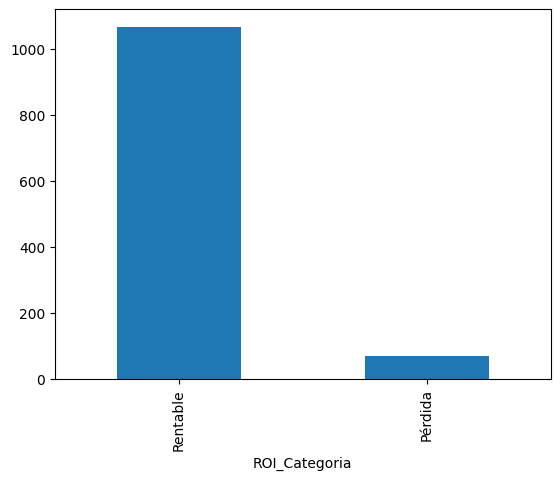

In [659]:
df['ROI_Categoria'].value_counts().plot(kind='bar')

In [660]:
# Se elimina la columna ROI original
df = df.drop('ROI', axis=1)

In [661]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,ROI_Categoria
0,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,Rentable
2,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable
5,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable
7,Ace Law Group,LVR,Imaging,1650.0,495.0,Pérdida
8,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable


In [662]:
# #Normalización: Sólo para variables numéricas (no dummies)
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler()
# df[[ 'Bill Amt', 'Purch Amt']] = min_max_scaler.fit_transform(df[['Bill Amt', 'Purch Amt']])
# df.head()

In [663]:
# #Variables categóricas con más de 2 categorías -> No borramos
# df = pd.get_dummies(df, columns=['Account Name','Provider Client','Subject'], drop_first=False, dtype=int)

In [664]:
# #LabelEncoder para la variable objetivo
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df["ROI_Categoria"]=labelencoder.fit_transform(df["ROI_Categoria"])
# df.head()

In [665]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,ROI_Categoria
0,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,Rentable
2,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable
5,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable
7,Ace Law Group,LVR,Imaging,1650.0,495.0,Pérdida
8,Ace Law Group,LVR,Imaging,1650.0,495.0,Rentable


In [666]:
df.to_csv('data_prepared.csv')